In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
train_data = pd.read_csv('train (1).csv')
test_data = pd.read_csv('test (1).csv')

In [45]:
Y_train_labels = train_data['Survived']
Y_test_PassengerId = test_data['PassengerId']  # Save for submission

In [46]:
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_data = train_data[selected_features]
test_data = test_data[selected_features]
datasets = [train_data, test_data]

In [47]:
for df in datasets:
    # Filling missing values.
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Fare'].fillna(df['Fare'].mean(), inplace=True)
    df['Embarked'].fillna(value='S', inplace=True)

    # Converting categorical features to numeric
    df['Sex'] = df['Sex'].replace(['female', 'male'], [0, 1]).astype(int)
    df['Embarked'] = df['Embarked'].replace(['S', 'Q', 'C'], [1, 2, 3]).astype(int)

<ipython-input-47-84543a34ce04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-47-84543a34ce04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'].fillna(df['Fare'].mean(), inplace=True)
<ipython-input-47-84543a34ce04>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'].fillna(value='S', inplace=True)
<ipython-input-47-84543a34ce04>:8: SettingWithCop

In [48]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())
train_data.head()
test_data.head()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [49]:
def sigmoid_activation(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [50]:
def initialize_weights_and_bias(dim):
    weights = np.zeros(shape=(dim, 1))
    bias = 0

    assert(weights.shape == (dim, 1))
    assert(isinstance(bias, float) or isinstance(bias, int))
    return weights, bias

In [51]:
def calculate_cost_and_gradients(weights, bias, X, Y):
    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid_activation(np.dot(weights.T, X) + bias)
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    assert(dw.shape == weights.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    gradients = {"dw": dw,
                 "db": db}
    return gradients, cost

In [52]:
def update_parameters(weights, bias, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []

    for i in range(num_iterations):
        # Cost and gradient calculation
        gradients, cost = calculate_cost_and_gradients(weights, bias, X, Y)

        # Retrieve derivatives from gradients
        dw = gradients["dw"]
        db = gradients["db"]

        # Update rule
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    parameters = {"weights": weights,
                  "bias": bias}
    gradients = {"dw": dw,
                 "db": db}
    return parameters, gradients, costs

In [53]:
def make_predictions(weights, bias, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    weights = weights.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities
    A = sigmoid_activation(np.dot(weights.T, X) + bias)
    for i in range(A.shape[1]):
        # Convert probabilities to actual predictions
        Y_prediction[0, i] = 1 if A[0, i] >= 0.5 else 0

    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [54]:
def train_model(X_train_data, Y_train_labels, X_test_data, num_iterations=2000, learning_rate=0.5, print_cost=False):
    # Initialize parameters with zeros
    weights, bias = initialize_weights_and_bias(X_train_data.shape[0])

    # Gradient descent
    trained_params, gradients, costs = update_parameters(weights, bias, X_train_data, Y_train_labels, num_iterations,
                                                          learning_rate, print_cost=False)

    # Retrieve parameters
    weights = trained_params["weights"]
    bias = trained_params["bias"]

    # Predict test/train set examples
    Y_train_predictions = make_predictions(weights, bias, X_train_data)
    Y_test_predictions = make_predictions(weights, bias, X_test_data)

    # Print train accuracy
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_train_predictions - Y_train_labels)) * 100))

    results = {"costs": costs,
               "Y_train_predictions": Y_train_predictions,
               "Y_test_predictions": Y_test_predictions,
               "weights": weights,
               "bias": bias,
               "learning_rate": learning_rate,
               "num_iterations": num_iterations}
    return results

In [55]:
# Make sure that dimensions are correct
X_train_data = np.array(train_data).T
Y_train_labels = np.array(Y_train_labels)

Y_train_labels = Y_train_labels.reshape(Y_train_labels.shape[0], 1).T
X_test_data = np.array(test_data).T

assert X_train_data.shape[1] == Y_train_labels.shape[1]
assert X_train_data.shape[0] == X_test_data.shape[0]

X_train_data.shape, Y_train_labels.shape, X_test_data.shape
results = train_model(X_train_data, Y_train_labels, X_test_data, num_iterations=50000, learning_rate=0.0001, print_cost=True)

train accuracy: 71.71717171717172 %


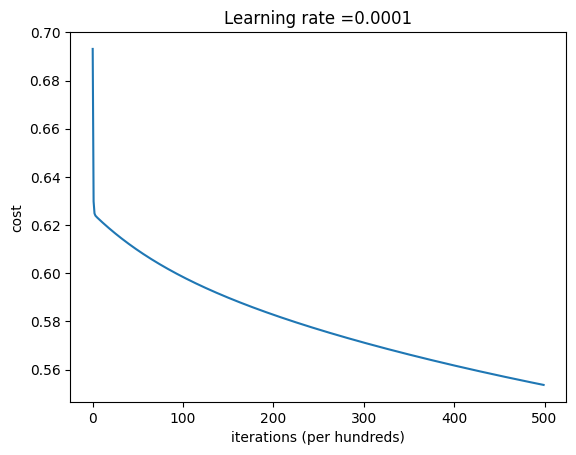

In [56]:
# Plot learning curve
costs = np.squeeze(results['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(results["learning_rate"]))
plt.show()

In [58]:
submission = pd.DataFrame({
    "PassengerId": Y_test_PassengerId,
    "Survived": results['Y_test_predictions'].T.flatten().astype(int)
})
submission.to_csv('prediction_modified.csv', index=False)